In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1) Operating Mode Detection:

In [29]:
df=pd.read_csv('pump_data_clean.csv')

In [30]:
df.shape

(5760, 27)

In [31]:
df.head()

,timestamp,Auxiliary Boilers A/B Feed Water Header Pressure 2,Auxiliary Boilers Feed Water Header Pressure,Heat Recovery System Header Mass Flow,Heat Recovery System Header Mass Flow.1,Heat Recovery System Header Pressure,Heat Recovery System Header Pressure.1,Lube Oil Cooler Outlet Temperature,Lube Oil Tank Temperature,Motor Current Phase A,...,Pump Journal 1 Bearing Temperature,Pump Journal 2 Bearing Temperature,Pump Radial Bearing Vibration,Pump Shaft Speed,Pump Suction Pressure 1,Pump Suction Pressure 2,Pump Suction Strainer Differential Pressure,Pump Suction Temperature,Pump Thrust Bearing Temperature 1,Pump Thrust Bearing Temperature 2
0,2018-01-01 00:00:15,1305.491089,1305.893799,301258.6563,304479.0625,1779.438599,1782.647461,71.223015,76.965309,145.308487,...,137.135651,144.300110,9.661202,4334.015110,24.951010,16.886732,0.272720,226.743881,98.050789,86.571556
1,2018-01-01 00:00:30,1301.227783,1299.925171,303027.7500,303782.2813,1779.364014,1782.624756,71.215706,76.948776,145.000000,...,137.133484,144.299057,9.655985,3725.372323,25.042177,16.886147,0.272987,226.743118,98.054756,86.565018
2,2018-01-01 00:00:45,1296.178589,1294.646606,301878.9688,303518.4375,1779.289551,1782.602173,71.208389,76.932243,146.306839,...,137.131317,144.298004,9.650768,2773.487119,25.012571,16.885561,0.273254,226.742371,98.058716,86.558487
3,2018-01-01 00:01:00,1297.628296,1299.988770,302023.0625,303576.3750,1779.214966,1782.579468,71.201080,76.912827,146.000000,...,137.129150,144.296936,9.645551,3575.028336,25.009590,16.884975,0.273521,226.741623,98.062683,86.551956
4,2018-01-01 00:01:15,1299.078003,1300.749023,301972.0625,303999.5313,1779.140381,1782.556885,71.193764,76.892960,146.305389,...,137.126968,144.295883,9.642216,3651.575273,25.006611,16.884392,0.273788,226.740860,98.066650,86.545425


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 27 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   timestamp                                           5760 non-null   object 
 1   Auxiliary Boilers A/B Feed Water Header Pressure 2  5760 non-null   float64
 2   Auxiliary Boilers Feed Water Header Pressure        5760 non-null   float64
 3   Heat Recovery System Header Mass Flow               5760 non-null   float64
 4   Heat Recovery System Header Mass Flow.1             5760 non-null   float64
 5   Heat Recovery System Header Pressure                5760 non-null   float64
 6   Heat Recovery System Header Pressure.1              5760 non-null   float64
 7   Lube Oil Cooler Outlet Temperature                  5760 non-null   float64
 8   Lube Oil Tank Temperature                           5760 non-null   float64
 9

In [33]:
df.drop(columns=['Motor Input Power','Motor Power Factor'], inplace=True)

In [34]:
df.shape

(5760, 25)

In [35]:
df['Pump Shaft Speed'].describe()

count    5760.000000
mean     3559.902427
std       593.078224
min      2637.936633
25%      2850.111370
50%      3590.936670
75%      3933.001019
max      4571.210061
Name: Pump Shaft Speed, dtype: float64

## Hist Plot of Pump Shaft Speed

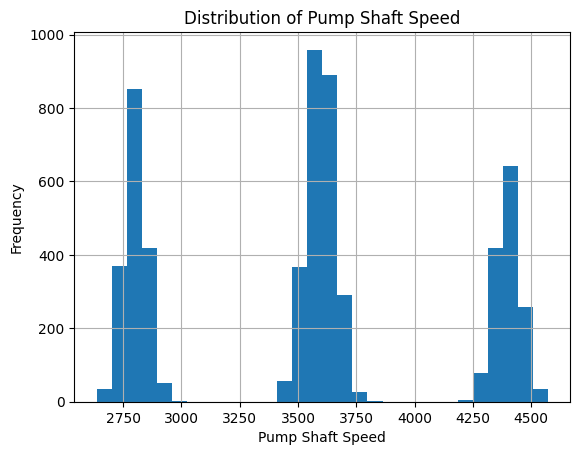

In [36]:
df['Pump Shaft Speed'].hist(bins=30)
plt.xlabel('Pump Shaft Speed')
plt.ylabel('Frequency')
plt.title('Distribution of Pump Shaft Speed')
plt.show()

## Visualization Insight:
The histogram of Pump Shaft Speed clearly shows three distinct peaks, indicating three discrete operating modes rather than a continuous range of RPMs.

## KDE Plot of Pump Shaft Speed

C:\Users\user\AppData\Local\Temp\ipykernel_13124\1264124086.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Pump Shaft Speed'], shade=True)


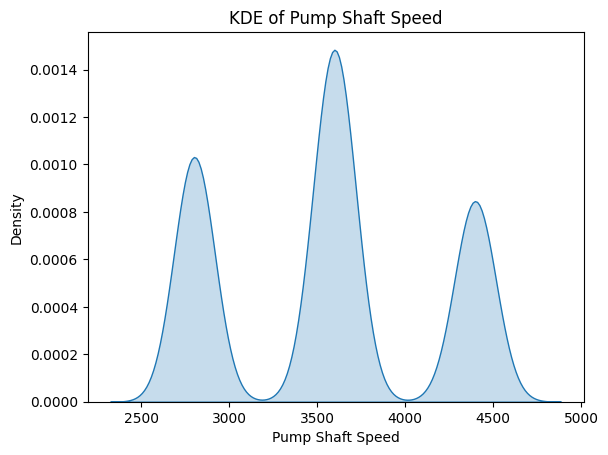

In [37]:
sns.kdeplot(df['Pump Shaft Speed'], shade=True)
plt.xlabel('Pump Shaft Speed')
plt.title('KDE of Pump Shaft Speed')
plt.show()

## Clustering of Pump Shaft Speed Data

In [39]:
from sklearn.cluster import KMeans
X=df[['Pump Shaft Speed']].values.reshape(-1,1)
kmeans=KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)



,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [40]:
df['Cluster']=kmeans.labels_


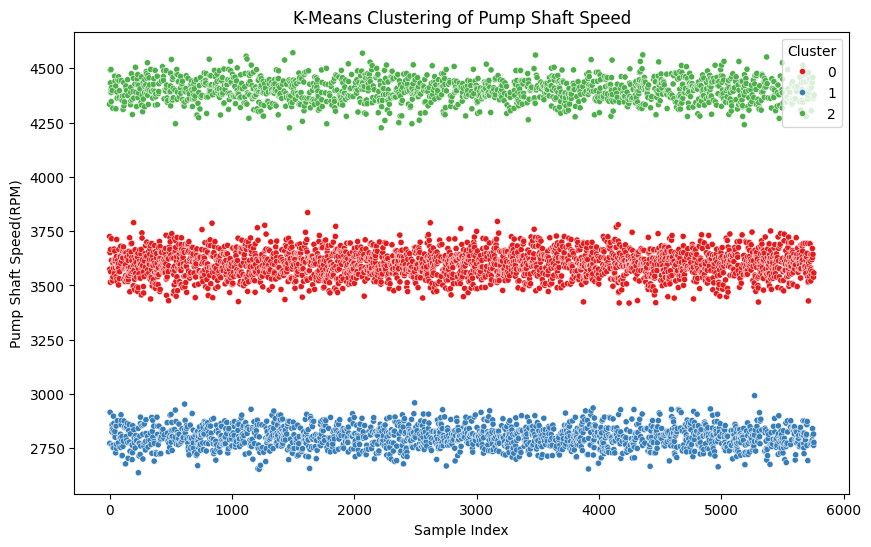

In [43]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x=df.index, y='Pump Shaft Speed', hue='Cluster', palette='Set1',s=20)
plt.xlabel('Sample Index')
plt.ylabel('Pump Shaft Speed(RPM)')
plt.title('K-Means Clustering of Pump Shaft Speed')
plt.show()

## Cluster Centers

In [46]:
centers=kmeans.cluster_centers_.flatten()
centers=sorted(centers)
centers


[np.float64(2802.4952804647464),
 np.float64(3598.9617284465066),
 np.float64(4398.484258572393)]

In [48]:
for i, center in enumerate(centers,1):
    print(f"Operating mode {i}: approx {center:.2f} RPM")
    



Operating mode 1: approx 2802.50 RPM
Operating mode 2: approx 3598.96 RPM
Operating mode 3: approx 4398.48 RPM


## Final Conclusion:
I used K-Means clustering on the shaft speed values. After determining the optimal number of clusters i.e 3 using the centroid method, I found three stable speed modes at around 2802.50 RPM, 3598.96 RPM, and 4398.48 RPM, indicating discrete motor operation.

## 2) Redundant Sensor Identification:

In [49]:
df2=pd.read_csv('sensor_data_renamed.csv')

In [50]:
df2.shape

(5760, 27)

In [51]:
df2.head()

,timestamp,A,B,C,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
0,2018-01-01 00:00:15,1305.491089,1305.893799,301258.6563,304479.0625,1779.438599,1782.647461,71.223015,76.965309,145.308487,...,137.135651,144.300110,9.661202,4334.015110,24.951010,16.886732,0.272720,226.743881,98.050789,86.571556
1,2018-01-01 00:00:30,1301.227783,1299.925171,303027.7500,303782.2813,1779.364014,1782.624756,71.215706,76.948776,145.000000,...,137.133484,144.299057,9.655985,3725.372323,25.042177,16.886147,0.272987,226.743118,98.054756,86.565018
2,2018-01-01 00:00:45,1296.178589,1294.646606,301878.9688,303518.4375,1779.289551,1782.602173,71.208389,76.932243,146.306839,...,137.131317,144.298004,9.650768,2773.487119,25.012571,16.885561,0.273254,226.742371,98.058716,86.558487
3,2018-01-01 00:01:00,1297.628296,1299.988770,302023.0625,303576.3750,1779.214966,1782.579468,71.201080,76.912827,146.000000,...,137.129150,144.296936,9.645551,3575.028336,25.009590,16.884975,0.273521,226.741623,98.062683,86.551956
4,2018-01-01 00:01:15,1299.078003,1300.749023,301972.0625,303999.5313,1779.140381,1782.556885,71.193764,76.892960,146.305389,...,137.126968,144.295883,9.642216,3651.575273,25.006611,16.884392,0.273788,226.740860,98.066650,86.545425


In [52]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 27 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  5760 non-null   object 
 1   A          5760 non-null   float64
 2   B          5760 non-null   float64
 3   C          5760 non-null   float64
 4   D          5760 non-null   float64
 5   E          5760 non-null   float64
 6   F          5760 non-null   float64
 7   G          5760 non-null   float64
 8   H          5760 non-null   float64
 9   I          5760 non-null   float64
 10  J          5760 non-null   float64
 11  K          5760 non-null   float64
 12  L          0 non-null      float64
 13  M          0 non-null      float64
 14  N          5760 non-null   float64
 15  O          5760 non-null   float64
 16  P          5760 non-null   float64
 17  Q          5760 non-null   float64
 18  R          5760 non-null   float64
 19  S          5760 non-null   float64
 20  T       

In [55]:
df2.drop(columns=['L','M'],inplace=True)

In [56]:
df2.shape

(5760, 25)

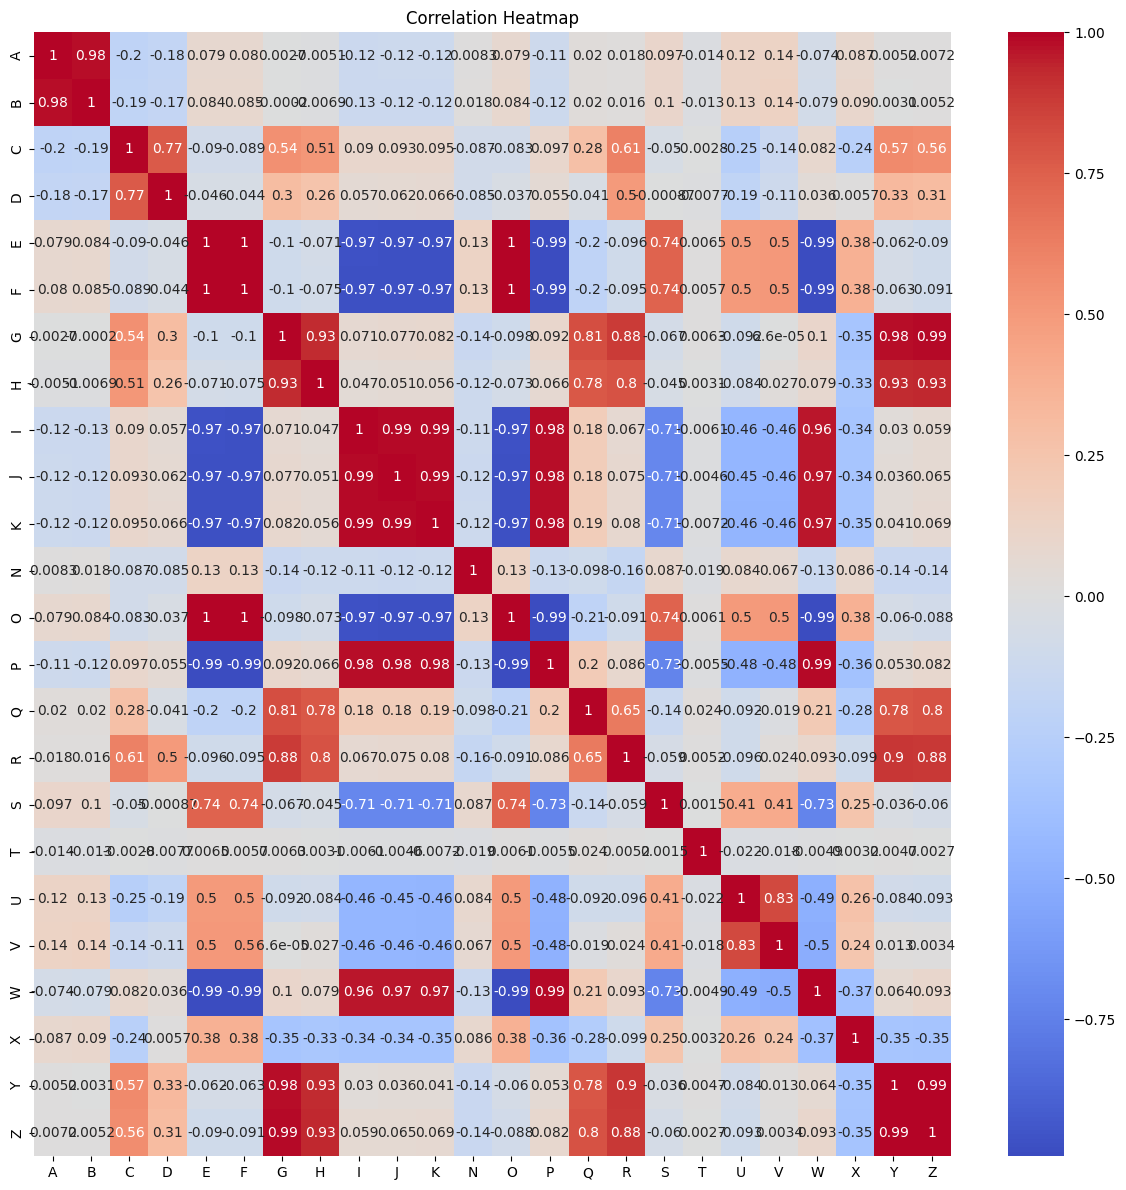

In [65]:
corr=df2.corr(numeric_only=True)
plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True, center=0, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

## a) Sensors that are measuring same kind of data:

In [68]:
similar_pairs=[]
threshold=0.90
for col1 in corr.columns:
    for col2 in corr.columns:
        if col1 < col2:
            if corr.loc[col1, col2] >= threshold:
                similar_pairs.append((col1, col2, corr.loc[col1, col2]))
similar_pairs=pd.DataFrame(similar_pairs, columns=['Sensor 1', 'Sensor 2', 'Correlation'])
similar_pairs.sort_values(by='Correlation', ascending=False)
            

,Sensor 1,Sensor 2,Correlation
3,F,O,0.998335
1,E,F,0.998289
2,E,O,0.998132
19,Y,Z,0.994177
6,G,Z,0.989542
9,I,J,0.989380
13,J,K,0.987761
10,I,K,0.987356
18,P,W,0.987190
5,G,Y,0.983574


## Insights:
Groups of Sensors Measuring the Same Data

1) E, F, O → Highly Redundant
2) Y, G, Z, H → Strongly Correlated
3) I, J, K, P, W → Tightly Coupled
4) A, B → Directly Correlated

## b) Sensors showing inverse (negative) relationship:

In [69]:
inverse_pairs=[]
threshold=-0.90
for col1 in corr.columns:
    for col2 in corr.columns:
        if col1 < col2:
            if corr.loc[col1, col2] <= threshold:
                inverse_pairs.append((col1, col2, corr.loc[col1, col2]))
inverse_pairs=pd.DataFrame(inverse_pairs, columns=['Sensor 1', 'Sensor 2', 'Correlation'])
inverse_pairs.sort_values(by='Correlation', ascending=True)


,Sensor 1,Sensor 2,Correlation
8,F,P,-0.993362
3,E,P,-0.993362
13,O,P,-0.993157
4,E,W,-0.991336
14,O,W,-0.990936
9,F,W,-0.990825
7,F,K,-0.972893
2,E,K,-0.972887
12,K,O,-0.972551
6,F,J,-0.972192


## Insights:
Group of sensors measuring inversely:
1) (E, F, O) & (P, W) → Inversely Related
2) (E, F, O) & (K, J, I) → Strongly Inverse

## 3) Feature Selection for Predictive Modeling:

In [71]:
corr_with_radial=df.select_dtypes(include='number').corr()['Pump Radial Bearing Vibration'].drop('Pump Radial Bearing Vibration')
corr_with_radial.sort_values(ascending=False)

Pump Discharge Pressure                               0.737473
Heat Recovery System Header Pressure.1                0.736907
Heat Recovery System Header Pressure                  0.735765
Pump Suction Pressure 2                               0.411758
Pump Suction Pressure 1                               0.405220
Pump Suction Temperature                              0.251691
Auxiliary Boilers Feed Water Header Pressure          0.102305
Auxiliary Boilers A/B Feed Water Header Pressure 2    0.096870
Motor Voltage                                         0.087074
Cluster                                               0.020970
Pump Shaft Speed                                      0.001482
Heat Recovery System Header Mass Flow.1              -0.000869
Pump Thrust Bearing Temperature 1                    -0.035518
Lube Oil Tank Temperature                            -0.044991
Heat Recovery System Header Mass Flow                -0.050196
Pump Journal 2 Bearing Temperature                   -0

## [Motor Input Power, Motor Power Factor] columns are eliminated due to NaN values.

## Following are the columns eliminated because of no predictive signal (Near Zero Correlation):

1. Cluster	
2. Pump Shaft Speed
3. Heat Recovery System Header Mass Flow.1	
4. Pump Thrust Bearing Temperature 1
5. Lube Oil Tank Temperature	-0.044991
6. Heat Recovery System Header Mass Flow
7. Pump Journal 2 Bearing Temperature
8. Pump Thrust Bearing Temperature 2
9. Lube Oil Cooler Outlet Temperature

## Columns eliminated due to redundancy:
1) Motor Current Phases A, B, C (-0.713 to -0.715 correlation with target)
These are highly correlated among themselves → keep only A.

2) Pump Discharge Volumetric Flow (-0.733) and Pump Discharge Pressure (0.737)
Likely redundant is Pump Discharge Volumetric Flow.

3) Pump Suction Pressures 1 & 2 (0.405–0.412).

## Constrained Feature Selection:

Recommended features:
1. Pump Discharge Pressure (strongest hydraulic predictor)
2. Pump Suction Strainer Differential Pressure (strong hydraulic predictor, less redundant)
3. Motor Current Phase A (electrical load indicator)
4. Pump Thrust Bearing Temperature 1 (mechanical load / bearing stress)

Supporting Evidence for the analysis:
1) High correlation with target (0.714–0.737)
2) Low redundancy between chosen features
3) Represents hydraulic, electrical, mechanical aspects (balanced predictive features)